<a href="https://colab.research.google.com/github/Gatiwi93/Pronosticos/blob/main/Capitulo_4/Modelo_Promedio_Movil_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cargar librerias y permitir acceso de drive

In [1]:
#Librerias
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
#Cargar Drive
drive.mount('/content/drive')

Mounted at /content/drive


##Recopilación de datos

##Conjunto de datos del [INEGI](https://www.inegi.org.mx/datosabiertos/)

In [3]:
# Ruta al archivo CSV en Google Drive
archivo_csv = '/content/drive/MyDrive/Recursos-Pronosticos/conjunto_de_datos_inpc_mensual.csv'

In [4]:
# Cargar el archivo CSV en un DataFrame de Pandas
datos = pd.read_csv(archivo_csv)

In [5]:
datos

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
0,Nacional,Mensual,01/01/2003,Índice nacional de precios al consumidor (mens...,42.679965,Índice,Cifras definitivas
1,Nacional,Mensual,01/01/2003,Índice nacional de precios al consumidor (mens...,42.108075,Índice,Cifras definitivas
2,Nacional,Mensual,01/01/2003,Índice nacional de precios al consumidor (mens...,43.014831,Índice,Cifras definitivas
3,Nacional,Mensual,01/01/2003,Índice nacional de precios al consumidor (mens...,53.525441,Índice,Cifras definitivas
4,Nacional,Mensual,01/01/2003,Índice nacional de precios al consumidor (mens...,57.447814,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1780,Nacional,Mensual,01/03/2024,Índice nacional de precios al consumidor (mens...,125.926000,Índice,Cifras definitivas
1781,Nacional,Mensual,01/03/2024,Índice nacional de precios al consumidor (mens...,134.065000,Índice,Cifras definitivas
1782,Nacional,Mensual,01/03/2024,Índice nacional de precios al consumidor (mens...,133.524000,Índice,Cifras definitivas
1783,Nacional,Mensual,01/03/2024,Índice nacional de precios al consumidor (mens...,140.366000,Índice,Cifras definitivas


##Exploración de datos

In [6]:
#Valores únicos de la columna CONCEPTO del conjunto de datos INPC Mensual
datos['CONCEPTO'].unique()

array(['Índice nacional de precios al consumidor (mensual), Resumen, Subíndices subyacente y complementarios, No subyacente',
       'Índice nacional de precios al consumidor (mensual), Resumen, Subíndices subyacente y complementarios, No subyacente, Agropecuarios',
       'Índice nacional de precios al consumidor (mensual), Resumen, Subíndices subyacente y complementarios, No subyacente, Energéticos y tarifas autorizadas por el gobierno',
       'Índice nacional de precios al consumidor (mensual), Resumen, Subíndices subyacente y complementarios, Precios al Consumidor (INPC)',
       'Índice nacional de precios al consumidor (mensual), Resumen, Subíndices subyacente y complementarios, Subyacente',
       'Índice nacional de precios al consumidor (mensual), Resumen, Subíndices subyacente y complementarios, Subyacente, Mercancías',
       'Índice nacional de precios al consumidor (mensual), Resumen, Subíndices subyacente y complementarios, Subyacente, Servicios'],
      dtype=object)

##Procesamiento de datos

In [7]:
#Filtrar por el concepto de INPC Energéticos
Energeticos = datos[datos['CONCEPTO'] == 'Índice nacional de precios al consumidor (mensual), Resumen, Subíndices subyacente y complementarios, No subyacente, Energéticos y tarifas autorizadas por el gobierno']

In [8]:
# Convertir la columna 'FECHA' a tipo datetime si no está en ese formato
Energeticos['FECHA'] = pd.to_datetime(Energeticos['FECHA'])

<ipython-input-8-871004038954>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Energeticos['FECHA'] = pd.to_datetime(Energeticos['FECHA'])


In [9]:
Energeticos

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
2,Nacional,Mensual,2003-01-01,Índice nacional de precios al consumidor (mens...,43.014831,Índice,Cifras definitivas
9,Nacional,Mensual,2003-01-02,Índice nacional de precios al consumidor (mens...,43.184520,Índice,Cifras definitivas
16,Nacional,Mensual,2003-01-03,Índice nacional de precios al consumidor (mens...,43.428921,Índice,Cifras definitivas
23,Nacional,Mensual,2003-01-04,Índice nacional de precios al consumidor (mens...,43.362076,Índice,Cifras definitivas
30,Nacional,Mensual,2003-01-05,Índice nacional de precios al consumidor (mens...,41.796755,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1752,Nacional,Mensual,2023-01-11,Índice nacional de precios al consumidor (mens...,122.342000,Índice,Cifras definitivas
1759,Nacional,Mensual,2023-01-12,Índice nacional de precios al consumidor (mens...,122.402000,Índice,Cifras definitivas
1766,Nacional,Mensual,2024-01-01,Índice nacional de precios al consumidor (mens...,123.113000,Índice,Cifras definitivas
1773,Nacional,Mensual,2024-01-02,Índice nacional de precios al consumidor (mens...,125.726000,Índice,Cifras definitivas


##Modelo de Promedio Móvil Simple

In [10]:
def promedio_movil_simple(data, window_size):
    """
    Calcula el promedio móvil simple de una serie de tiempo.

    Argumentos:
        data (pd.Series): Serie de tiempo.
        window_size (int): Tamaño de la ventana.

    Returns:
        pd.Series: Serie de tiempo.
    """
    pms = data.rolling(window=window_size).mean()
    return pms

In [11]:
# Definir la columna de la serie de tiempo
serie_tiempo = Energeticos['VALOR']

# Tamaño de la ventana para el SMA
ventana = 3

# Calcular el SMA
pms_resultado = promedio_movil_simple(serie_tiempo, ventana)

In [12]:
#Agregar la columna de PREDICCIONES al conjunto de datos
Energeticos['PREDICCIONES'] = pms_resultado
Energeticos

<ipython-input-12-a181e7f4d8a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Energeticos['PREDICCIONES'] = pms_resultado


,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS,PREDICCIONES
2,Nacional,Mensual,2003-01-01,Índice nacional de precios al consumidor (mens...,43.014831,Índice,Cifras definitivas,NaN
9,Nacional,Mensual,2003-01-02,Índice nacional de precios al consumidor (mens...,43.184520,Índice,Cifras definitivas,NaN
16,Nacional,Mensual,2003-01-03,Índice nacional de precios al consumidor (mens...,43.428921,Índice,Cifras definitivas,43.209424
23,Nacional,Mensual,2003-01-04,Índice nacional de precios al consumidor (mens...,43.362076,Índice,Cifras definitivas,43.325172
30,Nacional,Mensual,2003-01-05,Índice nacional de precios al consumidor (mens...,41.796755,Índice,Cifras definitivas,42.862584
...,...,...,...,...,...,...,...,...
1752,Nacional,Mensual,2023-01-11,Índice nacional de precios al consumidor (mens...,122.342000,Índice,Cifras definitivas,119.200000
1759,Nacional,Mensual,2023-01-12,Índice nacional de precios al consumidor (mens...,122.402000,Índice,Cifras definitivas,121.288333
1766,Nacional,Mensual,2024-01-01,Índice nacional de precios al consumidor (mens...,123.113000,Índice,Cifras definitivas,122.619000
1773,Nacional,Mensual,2024-01-02,Índice nacional de precios al consumidor (mens...,125.726000,Índice,Cifras definitivas,123.747000


In [13]:
# Eliminar filas con valores NaN
df_clean = Energeticos.dropna(subset=['PREDICCIONES'])

# Obtener las columnas limpias
predicciones = df_clean['PREDICCIONES']
valores_reales = df_clean['VALOR']

# Calcular el error cuadrático medio
ecm = mean_squared_error(valores_reales, predicciones)

print("Error cuadrático medio:", ecm)


Error cuadrático medio: 1.929838425569268


##Visualización de los datos

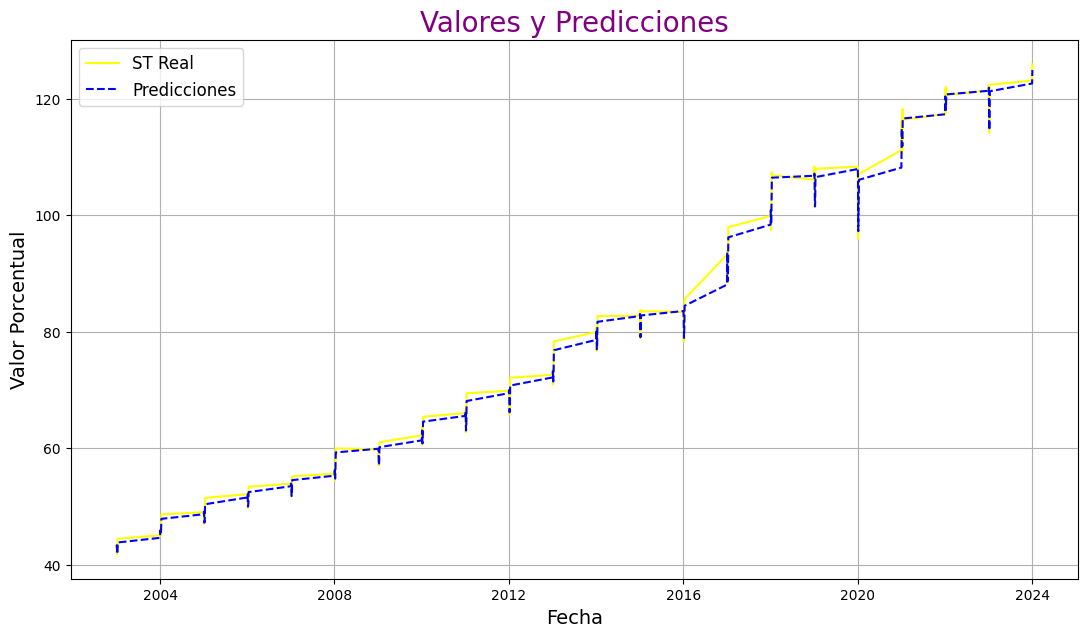

In [14]:
# Graficar
plt.figure(figsize=(13, 7))
#Datos
plt.plot(Energeticos['FECHA'], Energeticos['VALOR'], label='ST Real', linestyle='-', color='yellow')
plt.plot(Energeticos['FECHA'], Energeticos['PREDICCIONES'], label='Predicciones', linestyle='--', color='blue')
#Etiquetas
plt.xlabel('Fecha',fontsize=14)
plt.ylabel('Valor Porcentual',fontsize=14)
plt.title('Valores y Predicciones',color='purple',fontsize=20)
#Visual
plt.legend(fontsize=12)
plt.grid(True)
plt.show()